In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Problem Statement: 

For an orange juice company,
the marketing team claimed that their new marketing strategy resulted in an increase of sales. 

Determine if this is actually true.

Data:

January:

Average Daily Sales = \$10,000, sample size = 31, variance = 10,000,000

February:

Average Daily Sales = \$12,000, sample size = 28, variance = 20,000,000

How do we know that the increase in daily orange juice sales was not due to random variation in data?

# Null and Alternative Hypothesis

The amount of sales per day is not consistent throughout the month. 

The January data has a variance of 10,000,000 and a standard deviation of ~3162. 



On bad days, we would sell \$8,000, of orange juice. On good days, we would sell $14,000 of orange juice. 

We have to prove that the increase in average daily sales in February did not occur purely by chance.

H0: Null Hypothesis: No change in sales
    
H1: Alternate Hypothesis: Jan < Feb : Sales Increased

Possible Alternate Hypothesis:
    
1. Jan < Feb : Sales Increased

2. Jan > Feb : Sales Decreased

3. Jan Sales not equal to Feb Sales : Sales Changed 


In our case, the marketing department claimed that the sales has increased. So we would use the first alternative hypothesis.

NO ERROR: Null Hypothesis is Correct, Retain H0
    
Type II error, false negative: Alt Hypothesis(Sales Increased) is Correct, but Retain H0
    
Type I error, false positive: Null Hypothesis is Correct, but Retain H1

NO ERROR: Alt Hypothesis is Correct, Retain H1


Hypothesis testing uses the logic, The null hypothesis is True unless proved otherwise using data.

We use data as evidence to determine if the claims made against the null hypothesis is true.

--


p-value or Significance Level:

In order to come to a decision, we need to know if the February data is statistically significant.

We would have to calculate the probability of finding the observed, or more extreme data assuming that the null hypothesis, $H_0$ is true. This probability is known as the p-value.

If this probability is high, we would retain the null hypothesis. If this probability is low, we would reject the null hypothesis. 

This probability threshold known as the significance level, or $\alpha$. Many statisticians typically use $\alpha$ = 0.05.

Lets perform t test for facebook posts dataset

In [2]:
import pandas as pd
data = pd.read_csv('facebook_dataset.csv', delimiter=';')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


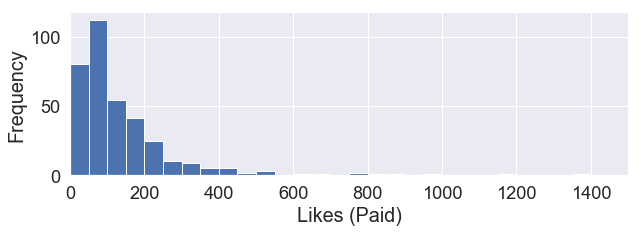

sample_size: 359
sample_mean: 155.84679665738162
sample_variance: 48403.23623970993


In [3]:
unpaid_likes = data[data['Paid']==0]['like']
unpaid_likes = unpaid_likes.dropna()
sns.set(font_scale=1.65)
fig = plt.figure(figsize=(10,3))
ax=unpaid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Paid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(unpaid_likes.shape[0]))
print('sample_mean: {}'.format(unpaid_likes.mean()))
print('sample_variance: {}'.format(unpaid_likes.var()))

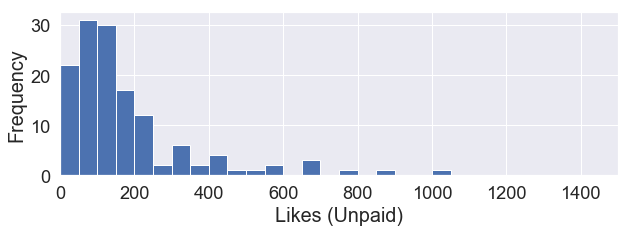

sample_size: 139
sample_mean: 235.6474820143885
sample_variance: 247175.07048274425


In [4]:
paid_likes = data[data['Paid']==1]['like']

fig = plt.figure(figsize=(10,3))
ax=paid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Unpaid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(paid_likes.shape[0]))
print('sample_mean: {}'.format(paid_likes.mean()))
print('sample_variance: {}'.format(paid_likes.var()))

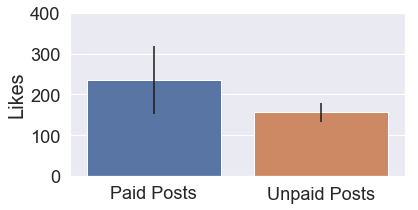

In [17]:
# Calculate confidence interval
paid_err = 1.96 * (paid_likes.std() / np.sqrt(paid_likes.shape[0]))
unpaid_err = 1.96 * (unpaid_likes.std() / np.sqrt(unpaid_likes.shape[0]))

x = ['Paid Posts', 'Unpaid Posts']
y = [paid_likes.mean(), unpaid_likes.mean()]
fig = plt.figure(figsize=(6, 3))
ax = sns.barplot(x=x, y=y, yerr=[paid_err, unpaid_err])
ax.set_ylim(0, 400)
plt.ylabel('Likes')
plt.show()

In [22]:
paid_var_ratio = paid_likes.var()/paid_likes.shape[0]
unpaid_var_ratio = unpaid_likes.var()/unpaid_likes.shape[0]

s_welch = np.sqrt(paid_var_ratio + unpaid_var_ratio)

t = (paid_likes.mean() - unpaid_likes.mean())/s_welch

print('t-value: {}'.format(t))

t-value: 1.824490721115131


In [23]:
df_num = (paid_var_ratio + unpaid_var_ratio)**2
df_dem = paid_var_ratio**2/(paid_likes.shape[0]-1) + unpaid_var_ratio**2/(unpaid_likes.shape[0]-1)
dof = df_num/df_dem
print('degrees of freedom: {}'.format(dof))

degrees of freedom: 159.3668015083367


In [24]:
from scipy import stats

t_score = stats.ttest_ind_from_stats(paid_likes.mean(), paid_likes.std(), paid_likes.shape[0], \
                               unpaid_likes.mean(), unpaid_likes.std(), unpaid_likes.shape[0], \
                               equal_var=False)
t_score

Ttest_indResult(statistic=1.824490721115131, pvalue=0.06995072279510872)

From the Welch's t-test we ended up with a two-tailed p-value of ~0.07, or ~0.035 for a one-tail test. We will reject the null hypothesis, and accept that Facebook advertisements does have a positive effect on the number "likes" on a post.